### Import relevant libraries

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

### Load and inspect the data

In [395]:
data = pd.read_csv(r'C:\Users\HP\Downloads\archive\Fraud_detection_dataset.csv')
data.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


In [396]:
data.tail(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50990,T12629,1157,2898.06,Online Purchase,8.0,Desktop,San Francisco,2,64,14,Credit Card,0
50991,T28348,1530,1069.09,ATM Withdrawal,6.0,Tablet,Houston,2,110,13,NaN,0
50992,T43512,1584,3631.26,Bank Transfer,17.0,Desktop,Seattle,4,81,13,Net Banking,0
50993,T5873,4911,3613.59,Online Purchase,11.0,Tablet,New York,3,58,7,Net Banking,0
50994,T48244,4842,1587.84,POS Payment,10.0,Tablet,New York,1,94,6,UPI,0
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [397]:
data.shape

(51000, 12)

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [399]:
data.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


### Clean and preprocess

In [400]:
data.isna().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [401]:
#Dropping irrelevant columns
data = data.drop(['Transaction_ID', 'User_ID'], axis=1)

#Fill missing columns with mode
data['Location'].fillna(data['Location'].mode(), inplace=True)
data['Payment_Method'].fillna(data['Payment_Method'].mode(), inplace=True)
data['Device_Used'].fillna(data['Device_Used'].mode(), inplace=True)

#fill missing column with median
data['Time_of_Transaction'].fillna(data['Time_of_Transaction'].median(), inplace=True)

#fill missing columns with mean
data['Transaction_Amount'].fillna(data['Transaction_Amount'].mean(), inplace=True)


le = LabelEncoder()
categorical_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,0,16.0,2,6,0,119,13,1,0
1,1554.58,0,13.0,1,5,4,79,3,0,0
2,2395.02,0,12.0,1,8,3,115,9,5,0
3,100.10,2,15.0,0,1,4,3,4,4,0
4,1490.50,4,19.0,1,6,2,57,7,0,0
...,...,...,...,...,...,...,...,...,...,...
50995,3112.51,2,15.0,1,5,0,7,8,1,0
50996,2897.15,3,3.0,1,4,1,75,11,3,1
50997,2204.43,4,18.0,1,6,3,73,5,0,0
50998,4787.17,4,19.0,2,5,2,108,14,3,0


### Basic

In [402]:
data.isnull().sum()

Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [403]:
data.dtypes

Transaction_Amount                  float64
Transaction_Type                      int32
Time_of_Transaction                 float64
Device_Used                           int32
Location                              int32
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                        int32
Fraudulent                            int64
dtype: object

In [404]:
# Fraudulent class distribution (gives it out in decimal) the 0 is non-fraudulent and 1 is fraudulent
data['Fraudulent'].value_counts(normalize=True)

# Absolute count gives the actual number of occurences for each class
data['Fraudulent'].value_counts()


Fraudulent
0    48490
1     2510
Name: count, dtype: int64

In [405]:
# Correlation matrix with Fraudulent column (values range from -1 to 1)
#Tells you which feature is more relevant in predicting fraud
correlation = data.corr()
correlation['Fraudulent'].sort_values(ascending=False)

Fraudulent                          1.000000
Transaction_Type                    0.007112
Device_Used                         0.006942
Time_of_Transaction                 0.006902
Account_Age                         0.006203
Transaction_Amount                  0.005368
Previous_Fraudulent_Transactions    0.001136
Payment_Method                      0.000628
Number_of_Transactions_Last_24H    -0.003877
Location                           -0.008826
Name: Fraudulent, dtype: float64

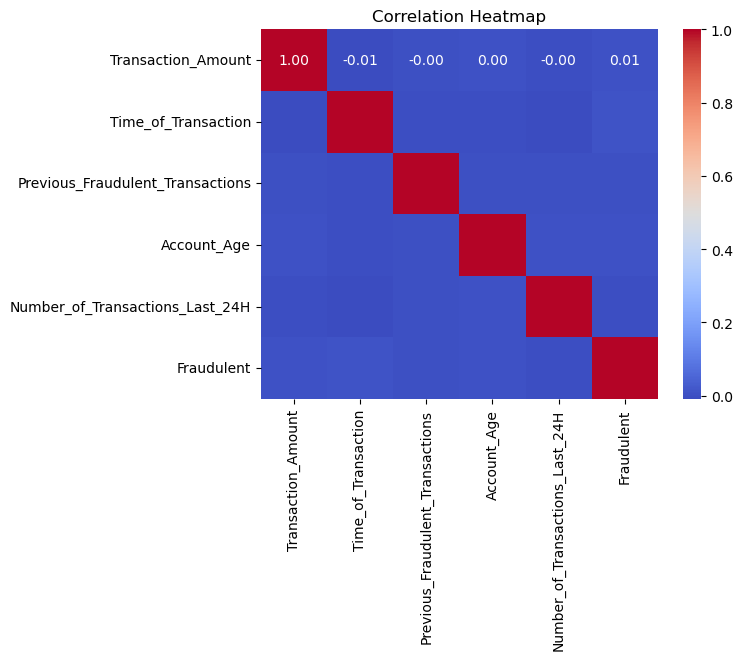

In [406]:
numeric_df = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [407]:
# calculates the average(mean) transaction amount for fraudulent and non-fraudulent transactions. (0 is non, 1 is fraudulent)
data.groupby('Fraudulent')['Transaction_Amount'].mean()

Fraudulent
0    2990.243388
1    3112.285698
Name: Transaction_Amount, dtype: float64

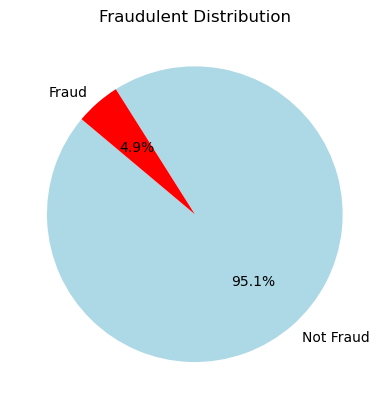

In [408]:
#Visualization for the fraudulent and non-fraudulent activities
fraud_counts = data['Fraudulent'].value_counts()
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Fraudulent Distribution')
plt.show()

In [409]:
#Visualization for the fraudulent and non-fraudulent activities from the devices used
data.groupby('Device_Used')['Fraudulent'].value_counts()

Device_Used  Fraudulent
0            0             15047
             1               748
1            0             14808
             1               806
2            0             14859
             1               729
3            0              1455
             1                75
4            0              2321
             1               152
Name: count, dtype: int64

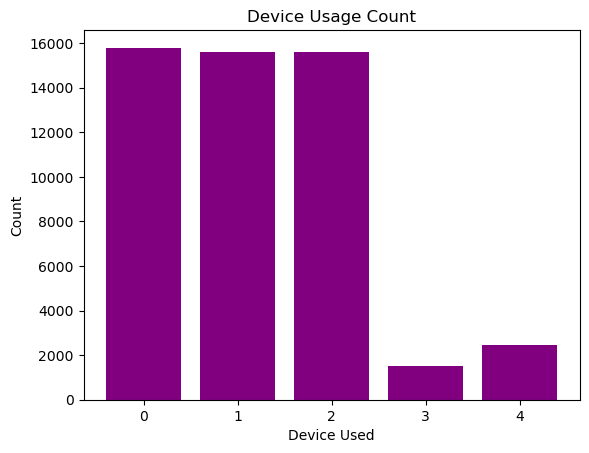

In [410]:
#Visualization for the most used device for fraudulent activities
device_counts = data['Device_Used'].value_counts()
plt.bar(device_counts.index, device_counts.values, color='purple')
plt.title('Device Usage Count')
plt.xlabel('Device Used')
plt.ylabel('Count')
plt.show()

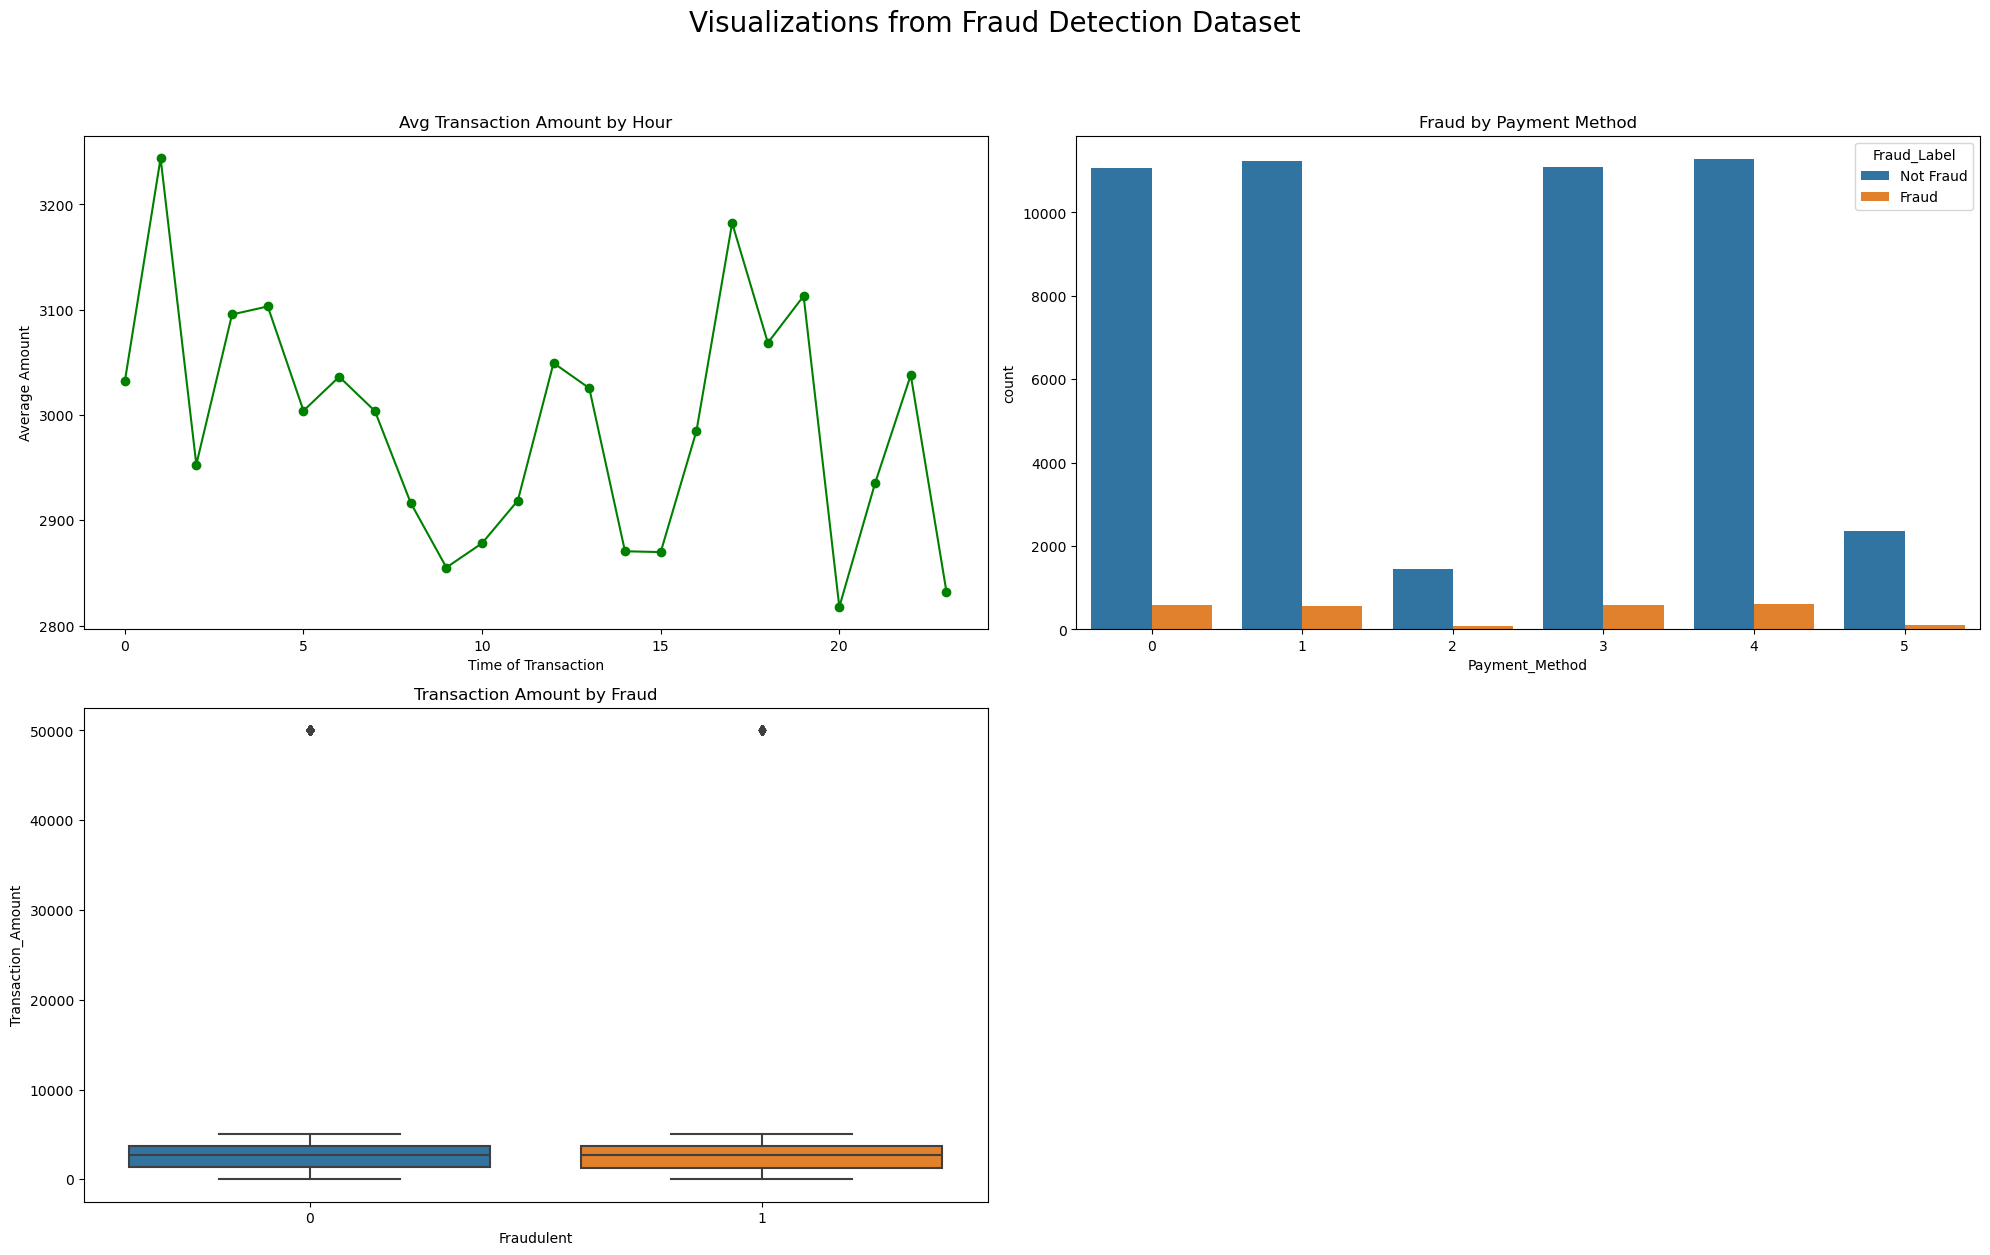

In [411]:
# Create new readable fraud label
data['Fraud_Label'] = data['Fraudulent'].map({0: 'Not Fraud', 1: 'Fraud'})

# Plot size and title
plt.figure(figsize=(20, 24))
plt.suptitle('Visualizations from Fraud Detection Dataset', fontsize=20)

# 3. Matplotlib Line Chart
plt.subplot(4, 2, 1)
hourly = data.groupby('Time_of_Transaction')['Transaction_Amount'].mean()
plt.plot(hourly.index, hourly.values, marker='o', color='green')
plt.title('Avg Transaction Amount by Hour')
plt.xlabel('Time of Transaction')
plt.ylabel('Average Amount')

# 4. Seaborn Countplot (FIXED)
plt.subplot(4, 2, 2)
sns.countplot(x='Payment_Method', hue='Fraud_Label', data=data)
plt.title('Fraud by Payment Method')

# 5. Seaborn Boxplot
plt.subplot(4, 2, 3)
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Fraud')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [449]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [450]:
print("NaNs before split:\n", data.isnull().sum().sort_values(ascending=False))

NaNs before split:
 Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
Fraud_Label                         0
dtype: int64


In [451]:
# Fill numeric NaNs with median
data = data.fillna(data.median(numeric_only=True))

In [452]:
print("Any NaNs left?", data.isnull().sum().sum() > 0)

Any NaNs left? False


In [453]:
x = data.drop(['Fraudulent', 'Fraud_Label'], axis=1, errors='ignore')
y = data['Fraudulent']

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [454]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [457]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train) 

LogisticRegression(max_iter=1000)

In [458]:
# y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)[:, 1]  # Probability of being Fraudulent (1)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [459]:
print("Accuracy score:\n",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy score:
 0.951437908496732
Confusion Matrix:
 [[14557     0]
 [  743     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     14557
           1       0.00      0.00      0.00       743

    accuracy                           0.95     15300
   macro avg       0.48      0.50      0.49     15300
weighted avg       0.91      0.95      0.93     15300


ROC-AUC Score: 0.5171082700750963


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Feature Influence on Fraud Detection'}>

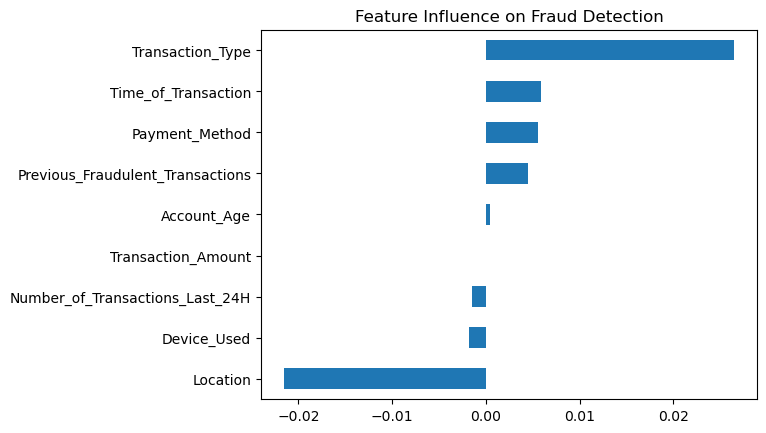

In [446]:
importance = pd.Series(model.coef_[0], index=x.columns).sort_values()
importance.plot(kind='barh', title="Feature Influence on Fraud Detection")